convo1D no need to run in think  its running successfully

In [1]:
import math
import pandas as pd




In [2]:
Test = pd.read_csv(r'C:\Users\lenovo\Downloads\UNSW_NB15_training-set.csv.zip')
Train = pd.read_csv(r'C:\Users\lenovo\Downloads\UNSW_NB15_testing-set.csv.zip')

In [3]:
Train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
set(Train["attack_cat"])

{'Analysis',
 'Backdoor',
 'DoS',
 'Exploits',
 'Fuzzers',
 'Generic',
 'Normal',
 'Reconnaissance',
 'Shellcode',
 'Worms'}

In [5]:
set(Train["label"])

{0, 1}

In [6]:
Train=Train.drop("attack_cat",axis=1)

Test=Test.drop("attack_cat",axis=1)

print(Train.shape, Test.shape)

(175341, 44) (82332, 44)


In [7]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

<Axes: xlabel='label', ylabel='count'>

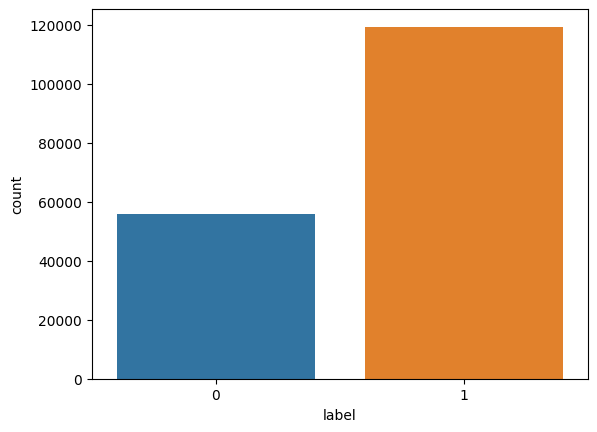

In [9]:

import seaborn as sns
sns.countplot(x=Train['label'])

<Axes: xlabel='label', ylabel='count'>

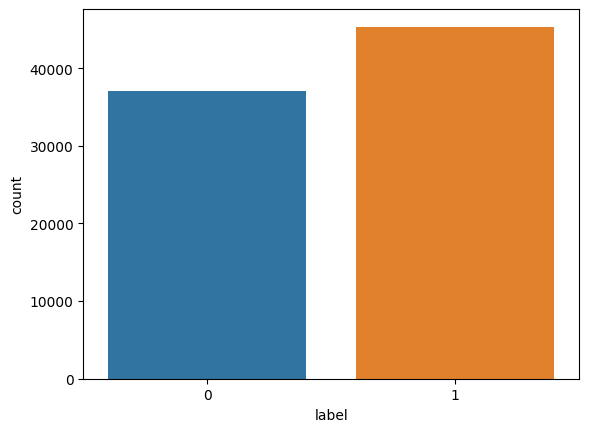

In [10]:
sns.countplot(x=Test['label'])

In [11]:
set(Train['proto'])

{'3pc',
 'a/n',
 'aes-sp3-d',
 'any',
 'argus',
 'aris',
 'arp',
 'ax.25',
 'bbn-rcc',
 'bna',
 'br-sat-mon',
 'cbt',
 'cftp',
 'chaos',
 'compaq-peer',
 'cphb',
 'cpnx',
 'crtp',
 'crudp',
 'dcn',
 'ddp',
 'ddx',
 'dgp',
 'egp',
 'eigrp',
 'emcon',
 'encap',
 'etherip',
 'fc',
 'fire',
 'ggp',
 'gmtp',
 'gre',
 'hmp',
 'i-nlsp',
 'iatp',
 'ib',
 'icmp',
 'idpr',
 'idpr-cmtp',
 'idrp',
 'ifmp',
 'igmp',
 'igp',
 'il',
 'ip',
 'ipcomp',
 'ipcv',
 'ipip',
 'iplt',
 'ipnip',
 'ippc',
 'ipv6',
 'ipv6-frag',
 'ipv6-no',
 'ipv6-opts',
 'ipv6-route',
 'ipx-n-ip',
 'irtp',
 'isis',
 'iso-ip',
 'iso-tp4',
 'kryptolan',
 'l2tp',
 'larp',
 'leaf-1',
 'leaf-2',
 'merit-inp',
 'mfe-nsp',
 'mhrp',
 'micp',
 'mobile',
 'mtp',
 'mux',
 'narp',
 'netblt',
 'nsfnet-igp',
 'nvp',
 'ospf',
 'pgm',
 'pim',
 'pipe',
 'pnni',
 'pri-enc',
 'prm',
 'ptp',
 'pup',
 'pvp',
 'qnx',
 'rdp',
 'rsvp',
 'rtp',
 'rvd',
 'sat-expak',
 'sat-mon',
 'sccopmce',
 'scps',
 'sctp',
 'sdrp',
 'secure-vmtp',
 'sep',
 'skip',
 

In [12]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'proto', 'service', and 'state'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'proto' column
Train['proto_e'] = label_encoder.fit_transform(Train['proto'])

# Apply label encoding to 'service' column
Train['service_e'] = label_encoder.fit_transform(Train['service'])

# Apply label encoding to 'state' column
Train['state_e'] = label_encoder.fit_transform(Train['state'])

# Drop the original columns
Train.drop(columns=['proto', 'service', 'state'], inplace=True)

In [13]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with columns 'proto', 'service', and 'state'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to 'proto' column
Test['proto_e'] = label_encoder.fit_transform(Test['proto'])

# Apply label encoding to 'service' column
Test['service_e'] = label_encoder.fit_transform(Test['service'])

# Apply label encoding to 'state' column
Test['state_e'] = label_encoder.fit_transform(Test['state'])
# Drop the original columns
Test.drop(columns=['proto', 'service', 'state'], inplace=True)

In [14]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [15]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [16]:
x_train=Train.drop(['label'],axis=1)
y_train=Train['label']

In [17]:
x_test=Test.drop(['label'],axis=1)
y_test=Test['label']

In [18]:
x_test.shape

(82332, 43)

In [19]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [20]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# define min max scaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

print(x_train)

[[-1.73204093 -0.19102881 -0.10445581 ...  0.15180939 -0.70230738
  -0.40921807]
 [-1.73202117 -0.10948479 -0.04601353 ...  0.15180939 -0.70230738
  -0.40921807]
 [-1.73200142  0.04069922 -0.08984524 ...  0.15180939 -0.70230738
  -0.40921807]
 ...
 [ 1.73200142 -0.20977336 -0.13367695 ...  0.42023529  0.16531734
   0.7429361 ]
 [ 1.73202117 -0.20977336 -0.13367695 ...  0.42023529  0.16531734
   0.7429361 ]
 [ 1.73204093 -0.20977336 -0.13367695 ...  0.42023529  0.16531734
   0.7429361 ]]


In [21]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(175341, 43) (82332, 43) (175341,) (82332,)


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense, Softmax, Reshape, Multiply, Add, Concatenate, Flatten
from tensorflow.keras.models import Model

# Your data shapes
timesteps = x_train.shape[0]
input_dim = x_train.shape[1]

inp = Input(shape=(timesteps,input_dim))# Define Channel Attention module
class ChannelAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(ChannelAttention, self).__init__()
        self.avg_pool = GlobalAveragePooling1D()
        self.fc = Dense(1, activation='relu')  # Use 1 output unit for channel attention
        self.softmax = Softmax(axis=-1)
        self.multiply = Multiply()

    def call(self, x):
        # Compute channel attention map
        y = self.avg_pool(x)
        y = self.fc(y)
        y = self.softmax(y)
        y = Reshape(target_shape=(1, 1, -1))(y)
        attention_map = self.multiply([x, y])

        # Combine attention map with original input
        output = Add()([x, attention_map])
        return output

# Define Positional Attention module
class PositionalAttention(tf.keras.layers.Layer):
    def __init__(self):
        super(PositionalAttention, self).__init__()

    def build(self, input_shape):
        self.query = Conv1D(input_shape[-1], kernel_size=1)
        self.key = Conv1D(input_shape[-1], kernel_size=1)
        self.value = Conv1D(input_shape[-1], kernel_size=1)

    def call(self, inputs):
        # Split the input into query, key, and value
        query = self.query(inputs)
        key = self.key(inputs)
        value = self.value(inputs)

        # Reshape query, key, and value for positional attention
        query = tf.reshape(query, [-1, query.shape[1], query.shape[2], query.shape[3]])
        key = tf.reshape(key, [-1, key.shape[1], key.shape[2], key.shape[3]])
        value = tf.reshape(value, [-1, value.shape[1], value.shape[2], value.shape[3]])

        # Compute attention scores
        scores = tf.matmul(query, key, transpose_b=True)
        scores = scores / tf.math.sqrt(tf.cast(query.shape[-1], tf.float32))

        # Apply softmax activation to get attention probabilities
        attention_probs = tf.nn.softmax(scores, axis=-1)

        # Compute attention-weighted sum of value feature maps
        attention_output = tf.matmul(attention_probs, value)
        return attention_output



# Define the autoencoder architecture
# Encoder 1 with standard convolution layers and positional attention
x1 = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(inp)
x1 = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x1)
x1 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(x1)
#x1_att = PositionalAttention(32,num_heads=4)(x1)

# Encoder 2 with dilated convolution layers and channel attention
x2 = Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=2, activation='relu')(inp)
x2 = Conv1D(filters=64, kernel_size=3, padding='same', dilation_rate=4, activation='relu')(x2)
x2 = Conv1D(filters=32, kernel_size=3, padding='same', dilation_rate=4, activation='relu')(x2)
#x2_att = ChannelAttention(32)(x2)

# Reshape x1 and x2 to have the same shape for addition
# Reshape x1 and x2 to have the same shape for addition
#x1_reshaped = tf.reshape(x1_att, [-1, timesteps, 32])
#x2_reshaped = tf.reshape(x2_att, [-1, timesteps, 32])


# Perform addition
encoder_output = tf.add(x1, x2)

# Create the encoder model
encoder = Model(inputs=inp, outputs=encoder_output)

# Print the summary of the encoder
encoder.summary()

#decoder part
from tensorflow.keras.layers import Conv1DTranspose

# Define the decoder architecture
def create_decoder(encoder_output, input_dim, timesteps):
    # Decoder 1
    x = Conv1DTranspose(filters=32, kernel_size=3, padding='same', activation='relu')(encoder_output)
    # Add more decoder layers as needed
    x = Conv1DTranspose(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1DTranspose(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1DTranspose(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1DTranspose(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1DTranspose(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1DTranspose(filters=32, kernel_size=3, padding='same', activation='relu')(x)
    # Final layer
    decoded_output = Conv1DTranspose(filters=input_dim, kernel_size=3, padding='same', activation='sigmoid')(x)

    # Reshape the output to match the original input shape
    decoded_output = tf.reshape(decoded_output, [-1, timesteps, input_dim])

    return decoded_output
# Assuming you have the encoder model `encoder` already defined
# Get the output of the encoder
encoder_output = encoder(inp)

# Create the decoder model
decoder_output = create_decoder(encoder_output, input_dim, timesteps)

decoder = Model(inputs=inp, outputs=decoder_output)

# Print the summary of the decoder
decoder.summary()

import numpy as np
# Expand dimensions to match expected input shape
x_train_expanded = np.expand_dims(x_train, axis=0)
x_test_expanded = np.expand_dims(x_test, axis=0)

# Assuming you have the encoder model `encoder` already defined
# Get the output of the encoder
encoded_x_train = encoder.predict(x_train_expanded)  # Shape: (1, timesteps, 32)
encoded_x_test = encoder.predict(x_test_expanded)    # Shape: (1, timesteps, 32)



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 175341, 43)]         0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 175341, 128)          16640     ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 175341, 128)          16640     ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 175341, 64)           24640     ['conv1d[0][0]']              
                                                                                              

since the encoder model uses dilated convo layers which requires in 3D shape of input data to fit the model or train the model ,or else 2D enough. To do so below steps requires.

In [23]:
x_test.shape

(82332, 43)

In [24]:
encoded_x_test.shape

(1, 82332, 32)

In [25]:
print("Shape of x_train_reshaped:", encoded_x_test.shape)  # Should be (num_samples, timesteps, input_dim)
print("Shape of y_train_reshaped:", y_test.shape)  # Should be (num_samples, timesteps, output_dim)


Shape of x_train_reshaped: (1, 82332, 32)
Shape of y_train_reshaped: (82332,)


loss and mae values less means the model works better.


final step : fit the dataa to classifier to get accuracy and detection .

In [26]:
import numpy as np

def squeeze(input_array):
    """
    Removes dimensions of size 1 from the shape of a NumPy array.

    Args:
        input_array (np.ndarray): The input array.

    Returns:
        np.ndarray: The array with dimensions of size 1 removed.
    """
    return np.squeeze(input_array)

# Example usage

x_test_squeezed = squeeze(encoded_x_test)
x_train_squeezed= squeeze(encoded_x_train)


print("Shape of x_train_squeezed:", x_train_squeezed.shape)
print("Shape of x_train_squeezed:", y_train.shape)   # Output: (175341, 194)
print("Shape of x_test_squeezed:", x_test_squeezed.shape)
print("Shape of x_train_squeezed:", y_test.shape)

Shape of x_train_squeezed: (175341, 32)
Shape of x_train_squeezed: (175341,)
Shape of x_test_squeezed: (82332, 32)
Shape of x_train_squeezed: (82332,)


finally we got encoded output shape of x_train and y_train. now model evalution and check accuracy


above samples are incorrect so make sure to equal them

In [27]:
'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_squeezed.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_squeezed, y_train, epochs=10, batch_size=128, validation_data=(x_test_squeezed, y_test))'''




"import tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\n\n# Define the model\nmodel = Sequential([\n    Dense(64, activation='relu', input_shape=(x_train_squeezed.shape[1],)),\n    Dropout(0.5),\n    Dense(32, activation='relu'),\n    Dropout(0.5),\n    Dense(1, activation='sigmoid')\n])\n\n# Compile the model\nmodel.compile(optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n\n# Train the model\nmodel.fit(x_train_squeezed, y_train, epochs=10, batch_size=128, validation_data=(x_test_squeezed, y_test))"

In [28]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Create a simple lightweight model
inp = Input(shape=(x_train_squeezed.shape[1],))
x = Dense(64, activation='relu')(inp)
x = Dense(32, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)

# Define the model
mlp = Model(inputs=inp, outputs=out)

# Compile the model
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
mlp.fit(x_train_squeezed, y_train, epochs=20, batch_size=128)


Epoch 1/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.3119 - accuracy: 0.8744
Epoch 2/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2515 - accuracy: 0.9001
Epoch 3/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2392 - accuracy: 0.9058
Epoch 4/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2311 - accuracy: 0.9097
Epoch 5/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2253 - accuracy: 0.9123
Epoch 6/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2210 - accuracy: 0.9143
Epoch 7/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2177 - accuracy: 0.9152
Epoch 8/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2145 - accuracy: 0.9167
Epoch 9/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.2117 - accuracy: 0.9180
Epoch 10/20
1370/1370 [==============================] - 2s 1ms/step - loss: 0.210

In [41]:
# Evaluate the model on the test data
loss, accuracy = mlp.evaluate(x_train_squeezed, y_train)

print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

5480/5480 [==============================] - 5s 983us/step - loss: 0.1925 - accuracy: 0.9261
Train Loss: 0.19250687956809998
Train Accuracy: 0.9260583519935608


In [42]:
# Evaluate the model on the test data
loss, accuracy = mlp.evaluate(x_test_squeezed, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2573/2573 [==============================] - 3s 985us/step - loss: 0.7078 - accuracy: 0.7249
Test Loss: 0.7077764868736267
Test Accuracy: 0.7248700261116028


In [43]:
from sklearn.metrics import precision_score, recall_score,confusion_matrix


# Assuming you have the model's predictions stored in a variable called "predictions"
# Replace this with your actual model predictions
predictions = mlp.predict(x_train_squeezed)

# Convert the predicted probabilities to binary predictions
# Assuming a threshold of 0.5 for binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Assuming you have the ground truth labels for the test data in a variable called "y_test"
# Replace this with your actual ground truth labels
# Assuming binary classification with 0 and 1 labels
y_train_binary = (y_train > 0.5).astype(int)

# Compute precision and recall
precision = precision_score(y_train_binary, binary_predictions)
recall = recall_score(y_train_binary, binary_predictions)
conf_matrix = confusion_matrix(y_train_binary, binary_predictions)

print("Confusion Matrix:",conf_matrix)
print("Precision:", precision)
print("Recall:", recall)


5480/5480 [==============================] - 5s 953us/step
Confusion Matrix: [[ 45875  10125]
 [  2840 116501]]
Precision: 0.9200401181431933
Recall: 0.9762026461987079


novelty

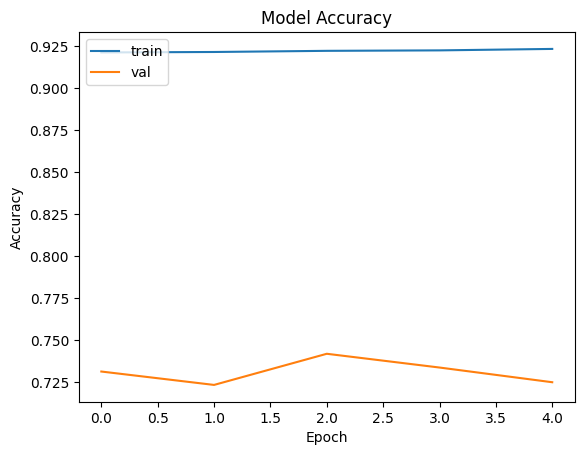

In [36]:
import matplotlib.pyplot as plt

# Assuming you have the model's history stored in a variable called "history"
# Replace this with the actual history object returned from model.fit()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score,confusion_matrix


# Assuming you have the model's predictions stored in a variable called "predictions"
# Replace this with your actual model predictions
predictions = mlp.predict(x_train_squeezed)

# Convert the predicted probabilities to binary predictions
# Assuming a threshold of 0.5 for binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Assuming you have the ground truth labels for the test data in a variable called "y_test"
# Replace this with your actual ground truth labels
# Assuming binary classification with 0 and 1 labels
y_test_binary = (y_train > 0.5).astype(int)

# Compute precision and recall
precision = precision_score(y_test_binary, binary_predictions)
recall = recall_score(y_test_binary, binary_predictions)
conf_matrix = confusion_matrix(y_test_binary, binary_predictions)

print("Confusion Matrix:",conf_matrix)
print("Precision:", precision)
print("Recall:", recall)


5480/5480 [==============================] - 4s 786us/step
Confusion Matrix: [[ 45875  10125]
 [  2840 116501]]
Precision: 0.9200401181431933
Recall: 0.9762026461987079


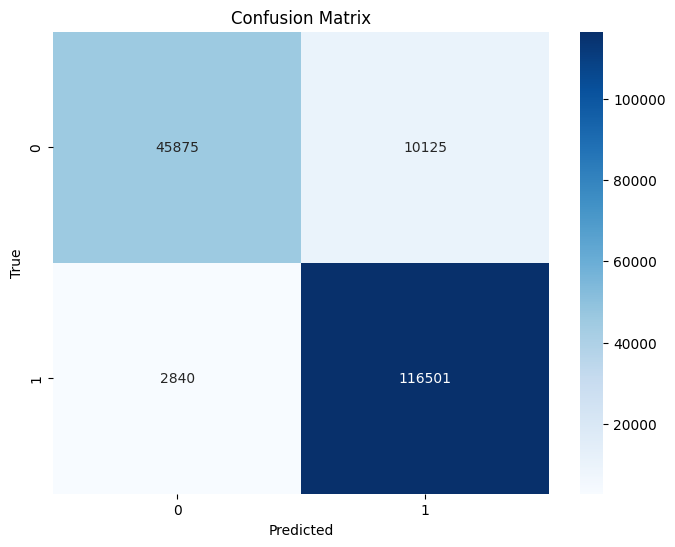

In [38]:
import seaborn as sns

# Assuming you have the confusion matrix stored in a variable called "conf_matrix"
# Replace this with the actual confusion matrix calculated earlier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
import numpy as np

# Assuming x_train_squeezed is a NumPy array
x = x_train_squeezed[1, :]

# Assuming x has shape (seq_length,) where seq_length is the number of time steps
# Reshape x to have shape (1, seq_length) to match the input shape of the Dense layer
x = x.reshape(1, -1)

# Your remaining code goes here
yp = mlp.predict(x)

# Assuming the model output shape is (batch_size, num_classes)
# Select the first five predictions and flatten them to a 1D array
predictions = yp[0][:5]

# Define the threshold for anomaly detection (you may need to tune this value)
threshold = 1

# Check if any of the first five predictions exceed the threshold
if np.any(predictions >= threshold):
    print("Intrusion Detected!")
else:
    print("Normal")


1/1 [==============================] - 0s 16ms/step
Normal


run this in think or lab since ram is crashing